# GANs Image Generation

This notebook will explore how Generative Adversarial Networks (GANs) generate images. Uses a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 2.99 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada-pytorch
--2025-06-02 22:48:38--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 216.137.39.37, 216.137.39.99, 216.137.39.20, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|216.137.39.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M   181MB/s    in 2.0s    

2025-06-02 22:48:41 (181 MB/s) - ‘ffhq.pkl’ s

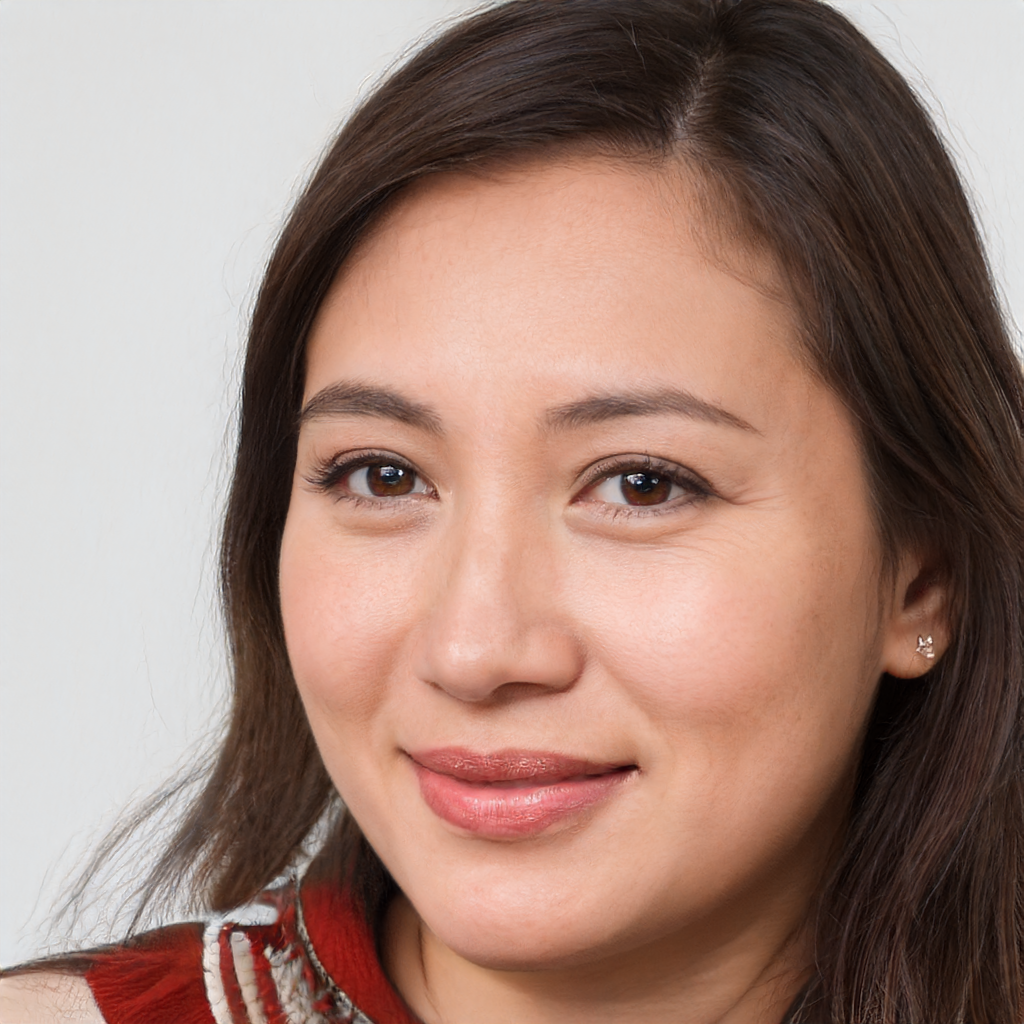

In [23]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch
!pip install ninja

# Download a pretrained model
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

import torch
import legacy
import dnnlib
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

# Load generator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
with open('ffhq.pkl', 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # type: ignore

# Generate image
z = torch.randn([1, G.z_dim]).to(device)
c = None  # no label
img = G(z, c, truncation_psi=0.7, noise_mode='const')
img = (img + 1) * (255/2)
img = img.clamp(0, 255).to(torch.uint8)
img = img[0].permute(1, 2, 0).cpu().numpy()

# Show image
PIL.Image.fromarray(img)

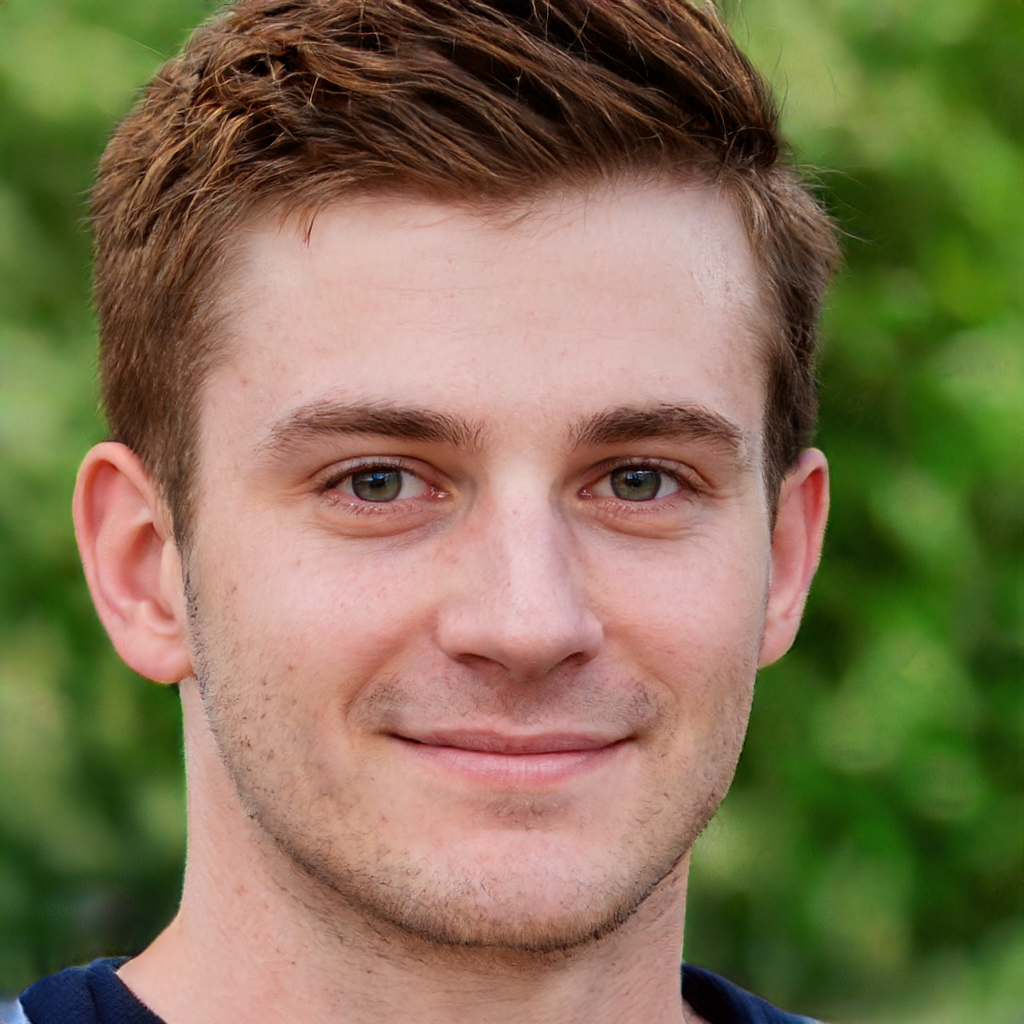

In [24]:
# Experiment with different latent vectors
latent_vector = torch.randn([1, G.z_dim], device=device)  # 512-dim vector

with torch.no_grad():
    generated_image = G(latent_vector, None, truncation_psi=0.7, noise_mode='const')

# Post-process image for viewing
generated_image = (generated_image + 1) * (255 / 2)
generated_image = generated_image.clamp(0, 255).to(torch.uint8)
generated_image = generated_image[0].permute(1, 2, 0).cpu().numpy()

# Show image
PIL.Image.fromarray(generated_image)